# **Programming for Data Science**
## **Final Project**

**Student Information:**

Student D|Full Name
-|-
21127469|Vo Thanh Tu
22127117|Ly Lien Hoa
22127232|Le Thi Ngoc Linh

**Dataaset**
[[Kaggle] - Customer purchase behavior - Electronic Sales Data
](https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024)

## **0. Import library and description**

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

## **1. Collecting Data** 

In [2]:
# Read the dataset
sales_df = pd.read_csv('Data/sales.csv')  

# Display the first five rows of the dataset
print("Sales Dataset:")  
print(sales_df.head())  

Sales Dataset:
   Customer ID  Age Gender Loyalty Member Product Type      SKU  Rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   
1         1000   53   Male             No       Tablet  SKU1002       3   
2         1002   41   Male             No       Laptop  SKU1005       3   
3         1002   41   Male            Yes   Smartphone  SKU1004       2   
4         1003   75   Male            Yes   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   
1    Completed         Paypal       741.09      247.03         3   
2    Completed    Credit Card      1855.84      463.96         4   
3    Completed           Cash      3164.76      791.19         4   
4    Completed           Cash        41.50       20.75         2   

  Purchase Date Shipping Type              Add-ons Purchased  Add-on Total  
0    2024-03-20      Standard  Accessory,Accesso

In [3]:
# Display the number of columns and rows in the dataset
num_col = len(sales_df.columns)

num_row = len(sales_df.index)


print("Number of columns: ", num_col)

print("Number of rows: ", num_row)

Number of columns:  16
Number of rows:  20000


In [4]:
# Display the column names and its description in the dataset
col_description_df = pd.read_csv('Data/description.csv')
col_description_df = col_description_df.rename(
    columns={'Feature': 'Column'})
col_description_df = col_description_df.set_index('Column')

print("Column Description:")
print(col_description_df)

Column Description:
                                                         Description
Column                                                              
Customer ID                      Unique identifier for each customer
Age                                    Age of the customer (numeric)
Gender                       Gender of the customer (Male or Female)
Loyalty Member     (Yes/No) (Values change by time, so pay attent...
Product Type       Type of electronic product sold (e.g., Smartph...
SKU                                   a unique code for each product
Rating             Customer rating of the product (1-5 stars) (Sh...
Order Status              Status of the order (Completed, Cancelled)
Payment Method     Method used for payment (e.g., Cash, Credit Ca...
Total Price                 Total price of the transaction (numeric)
Unit Price                   Price per unit of the product (numeric)
Quantity                         Number of units purchased (numeric)
Purchase Date 

In [5]:
# Display the information about the dataset
print("Sales Dataset Info:")  
print(sales_df.info()) 

Sales Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes:

## **2. Exploring Data Analysis (EDA)**

In [6]:
# Display the summary statistics of the dataset
print("Missing values in Sales Dataset:")  
print(sales_df.isnull().sum())  

Missing values in Sales Dataset:
Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64


In [7]:
# Display the percentage of missing values in the dataset
print("\nPercentage of missing values in Sales Dataset:")
print((sales_df.isnull().sum() / len(sales_df)) * 100)


Percentage of missing values in Sales Dataset:
Customer ID           0.000
Age                   0.000
Gender                0.005
Loyalty Member        0.000
Product Type          0.000
SKU                   0.000
Rating                0.000
Order Status          0.000
Payment Method        0.000
Total Price           0.000
Unit Price            0.000
Quantity              0.000
Purchase Date         0.000
Shipping Type         0.000
Add-ons Purchased    24.340
Add-on Total          0.000
dtype: float64


In [8]:
# Fill missing gender values with mode
sales_df['Gender'].fillna(sales_df['Gender'].mode()[0], inplace=True)

In [9]:
# Display the summary statistics of the dataset after filling missing values
print("Sales Dataset Statistics:")  
print(sales_df.describe())  

Sales Dataset Statistics:
        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   

           Quantity  Add-on Total  
count  20000.000000  20000.000000  
mean       5.485550     62.244848  
std        2.870854     58.058431  
min        1.000000      0.000000  
25%        3.000000      7.615000  
50%        5.000000     51.700000  
75%       

In [10]:
# Display the unique values in the dataset
print("\nSales Dataset Categorical Columns:")  
for col in sales_df.select_dtypes(include=['object']).columns:  
    print(f"\nValue counts for {col}:")  
    print(sales_df[col].value_counts()) 


Sales Dataset Categorical Columns:

Value counts for Gender:
Male      10165
Female     9835
Name: Gender, dtype: int64

Value counts for Loyalty Member:
No     15657
Yes     4343
Name: Loyalty Member, dtype: int64

Value counts for Product Type:
Smartphone    5978
Tablet        4104
Laptop        3973
Smartwatch    3934
Headphones    2011
Name: Product Type, dtype: int64

Value counts for SKU:
TBL345     2062
SKU1002    2042
SKU1004    2019
SKU1005    2012
HDP456     2010
SMP234     1987
SWT567     1980
SKU1001    1972
LTP123     1961
SKU1003    1955
Name: SKU, dtype: int64

Value counts for Order Status:
Completed    13432
Cancelled     6568
Name: Order Status, dtype: int64

Value counts for Payment Method:
Credit Card      5868
Bank Transfer    3371
PayPal           3284
Paypal           2514
Cash             2492
Debit Card       2471
Name: Payment Method, dtype: int64

Value counts for Purchase Date:
2024-04-26    88
2024-07-02    85
2024-01-28    84
2024-04-20    83
2024-01-09  

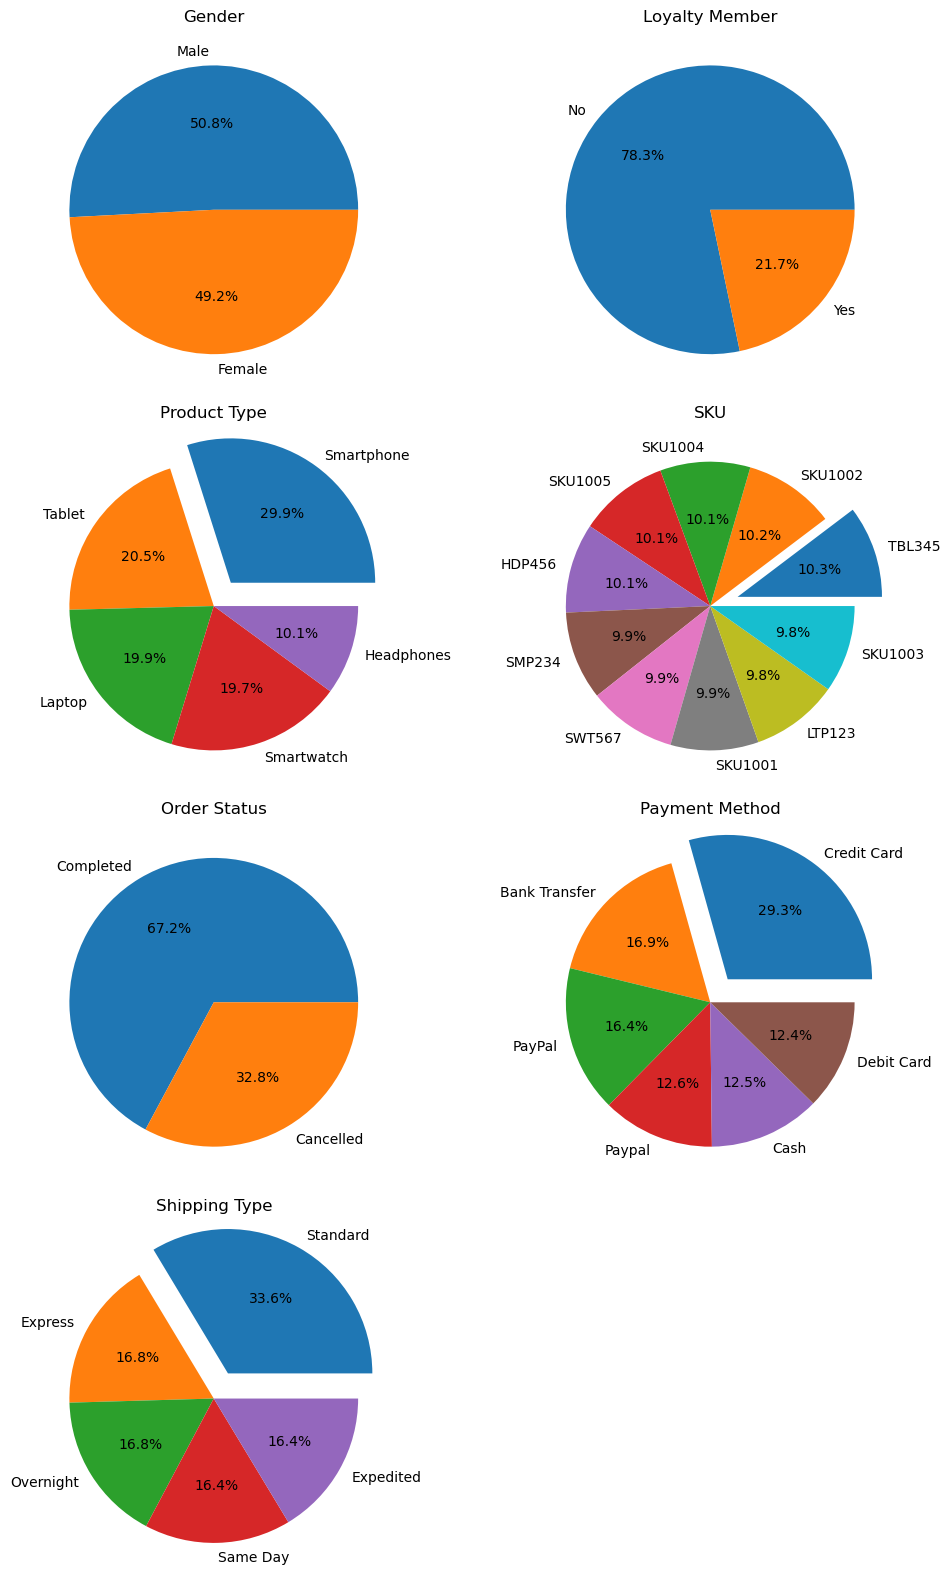

In [11]:
# Get categorical columns with less than 20 unique values for pie charts
categorical_cols = [col for col in sales_df.select_dtypes(include=['object']).columns 
                   if len(sales_df[col].unique()) <= 20]

fig_row = len(categorical_cols) // 2 + len(categorical_cols) % 2

# Plot pie charts for categorical columns
fig, axes = plt.subplots(fig_row, 2, figsize=(10, 4 * fig_row))
for i, col in enumerate(categorical_cols):
    ax = axes[i // 2, i % 2]
    highest_idx = sales_df[col].value_counts().idxmax()
    if len(sales_df[col].unique()) > 2:
        explode = [0.2 if idx == highest_idx else 0 for idx in sales_df[col].value_counts().index]
    else:
        explode = None
    sales_df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, explode=explode)
    ax.set_title(col)
    ax.set_ylabel('')

# Hide empty subplots
for i in range(len(categorical_cols), fig_row * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.tight_layout()
plt.show()

<Axes: >

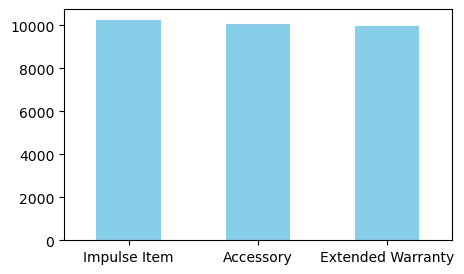

In [12]:
# Frequncy of Add-ons Purchased
addons = sales_df['Add-ons Purchased'].str.split(',').explode().str.strip().value_counts()
addons.plot(kind='bar', figsize=(5, 3), color='skyblue', rot=0)

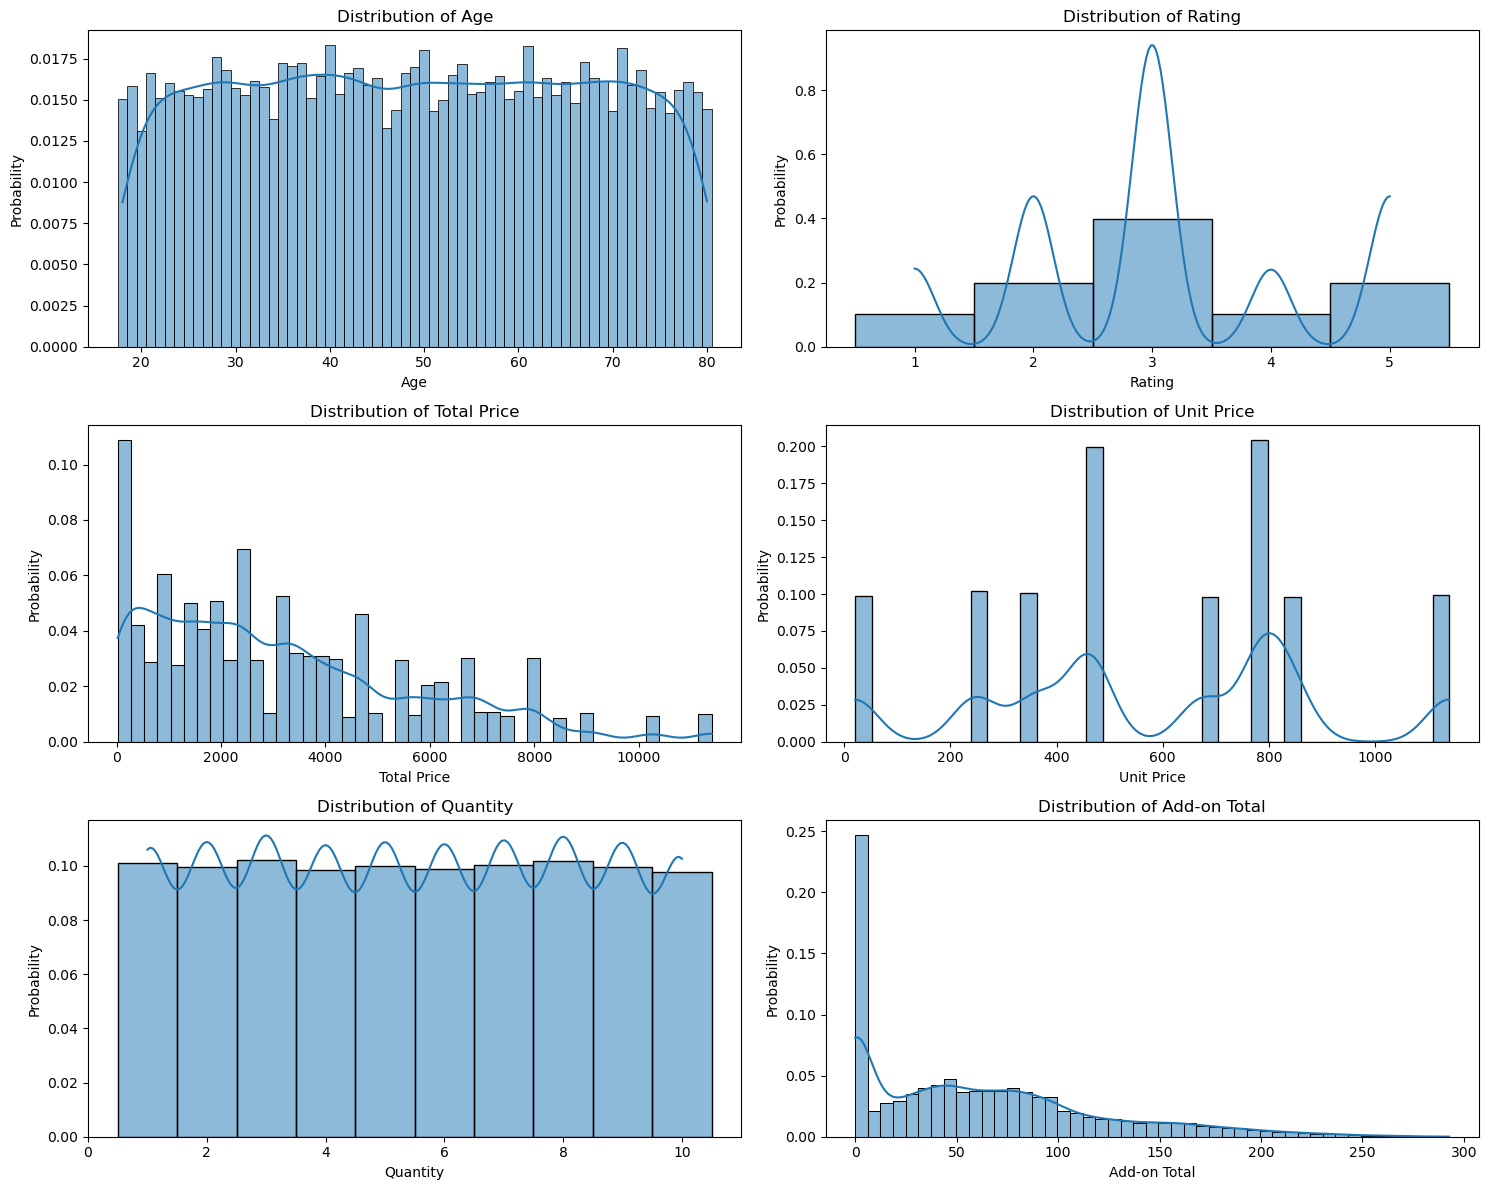

In [13]:
# Display the distribution of numerical columns

numeric_cols = sales_df.select_dtypes(
    include=['int64', 'float64']).columns.drop('Customer ID')
fig_row = len(numeric_cols) // 2 + len(numeric_cols) % 2
fig, axes = plt.subplots(fig_row, 2, figsize=(15, 4 * fig_row))

for i, col in enumerate(numeric_cols):
	row = i // 2
	col_idx = i % 2
	if sales_df[col].dtype == 'int64':
		sns.histplot(sales_df[col], ax=axes[row, col_idx],
					kde=True, stat='probability', discrete=True)
	else:
		sns.histplot(sales_df[col], ax=axes[row, col_idx],
					kde=True, stat='probability')
	axes[row, col_idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

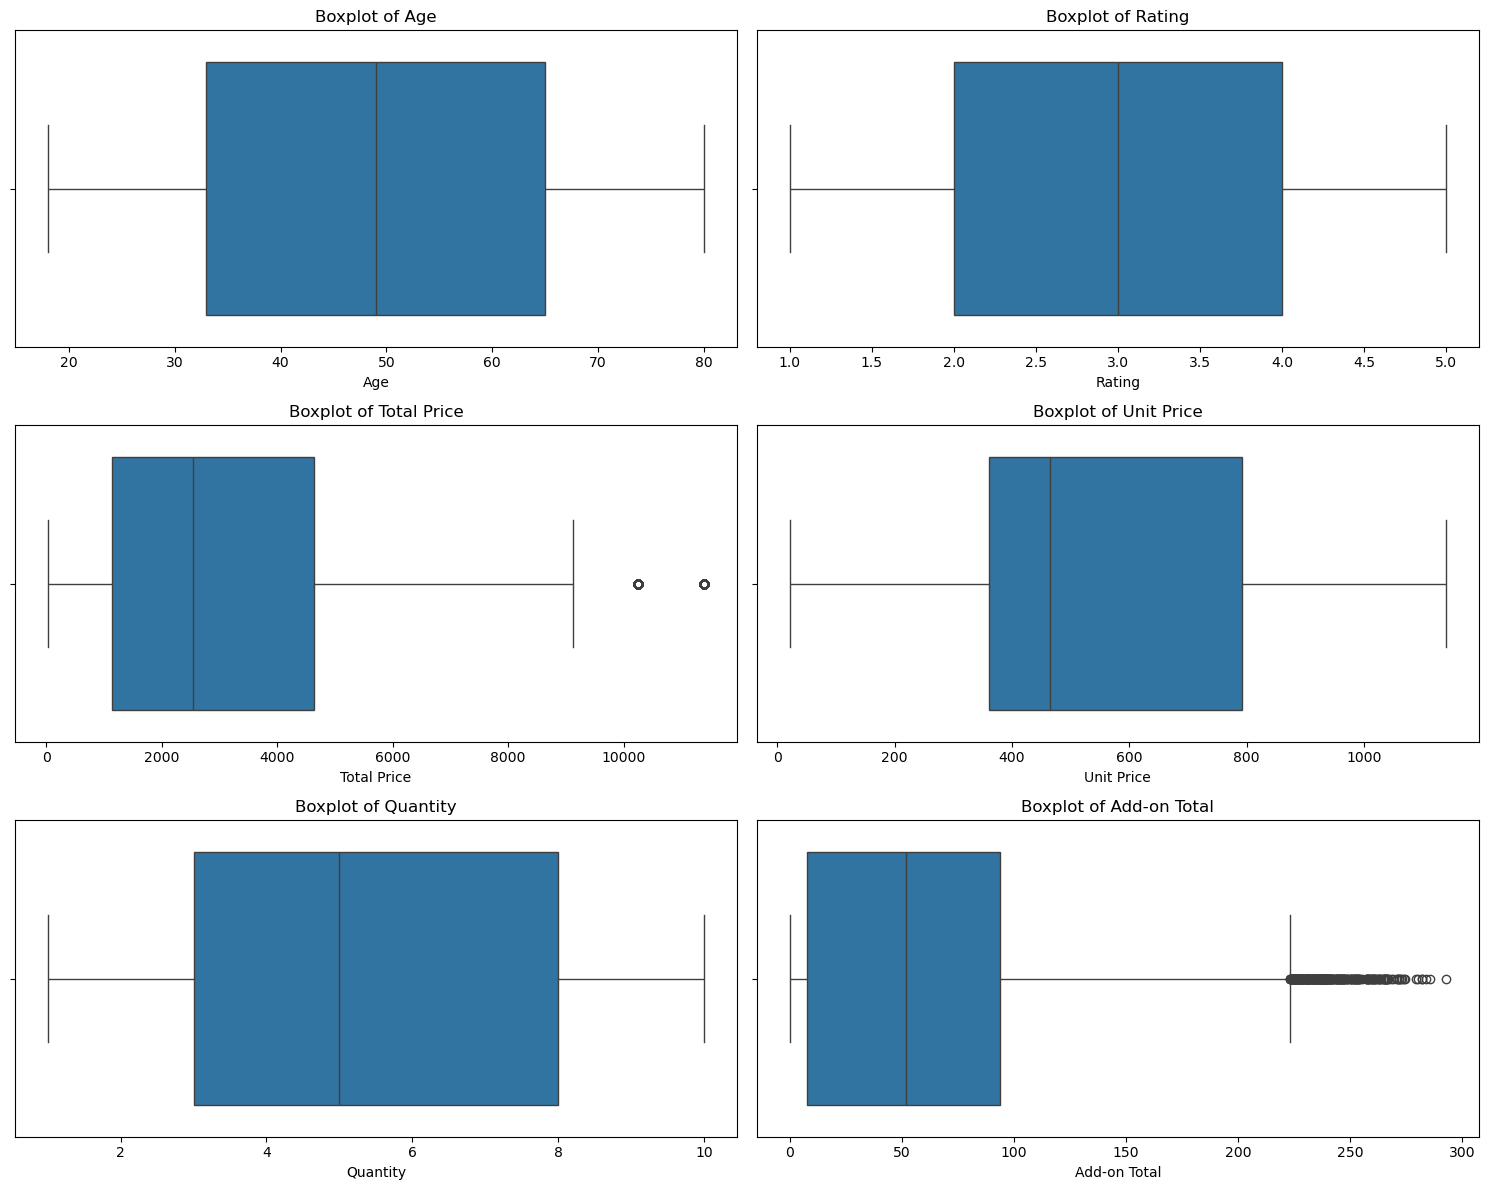

In [14]:
fig_row = len(numeric_cols) // 2 + len(numeric_cols) % 2
fig, axes = plt.subplots(fig_row, 2, figsize=(15, 4 * fig_row))

for i, col in enumerate(numeric_cols):
    row = i // 2
    col_idx = i % 2
    sns.boxplot(x=sales_df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

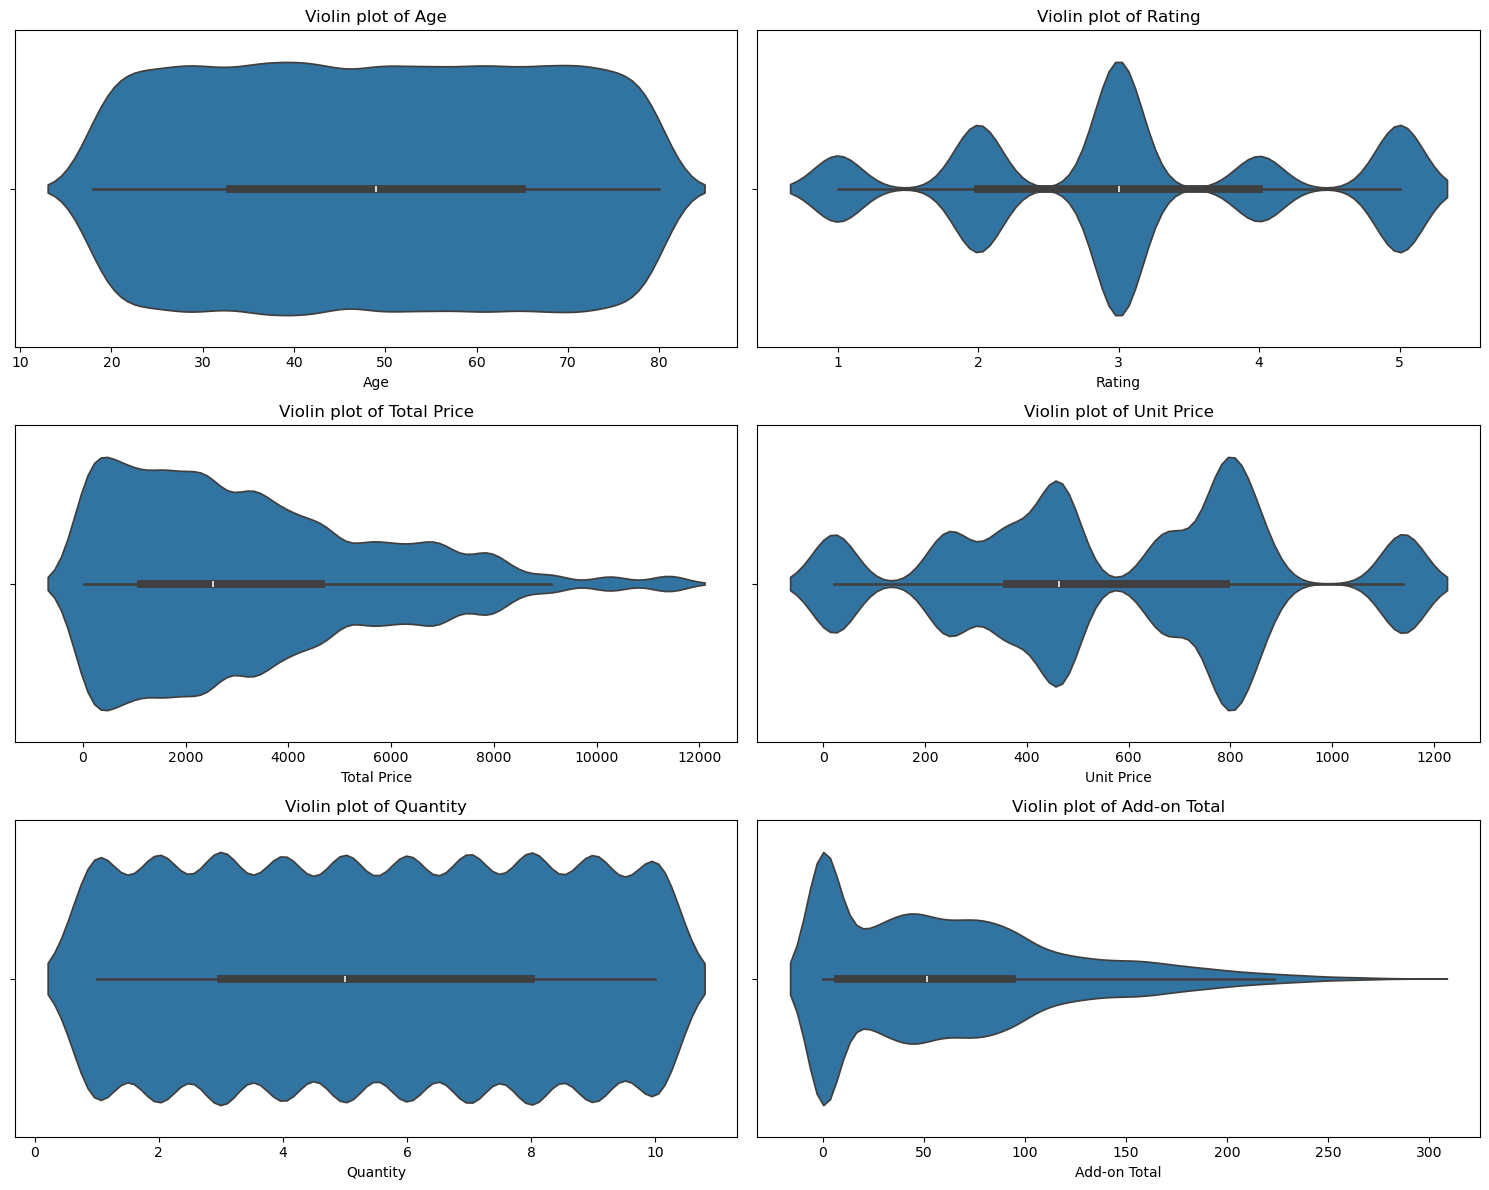

In [15]:
fig_row = len(numeric_cols) // 2 + len(numeric_cols) % 2
fig, axes = plt.subplots(fig_row, 2, figsize=(15, 4 * fig_row))

for i, col in enumerate(numeric_cols):
    row = i // 2
    col_idx = i % 2
    sns.violinplot(x=sales_df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Violin plot of {col}')
    
plt.tight_layout()
plt.show()

C:\Users\thanh\AppData\Local\Temp\ipykernel_24708\4272472659.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


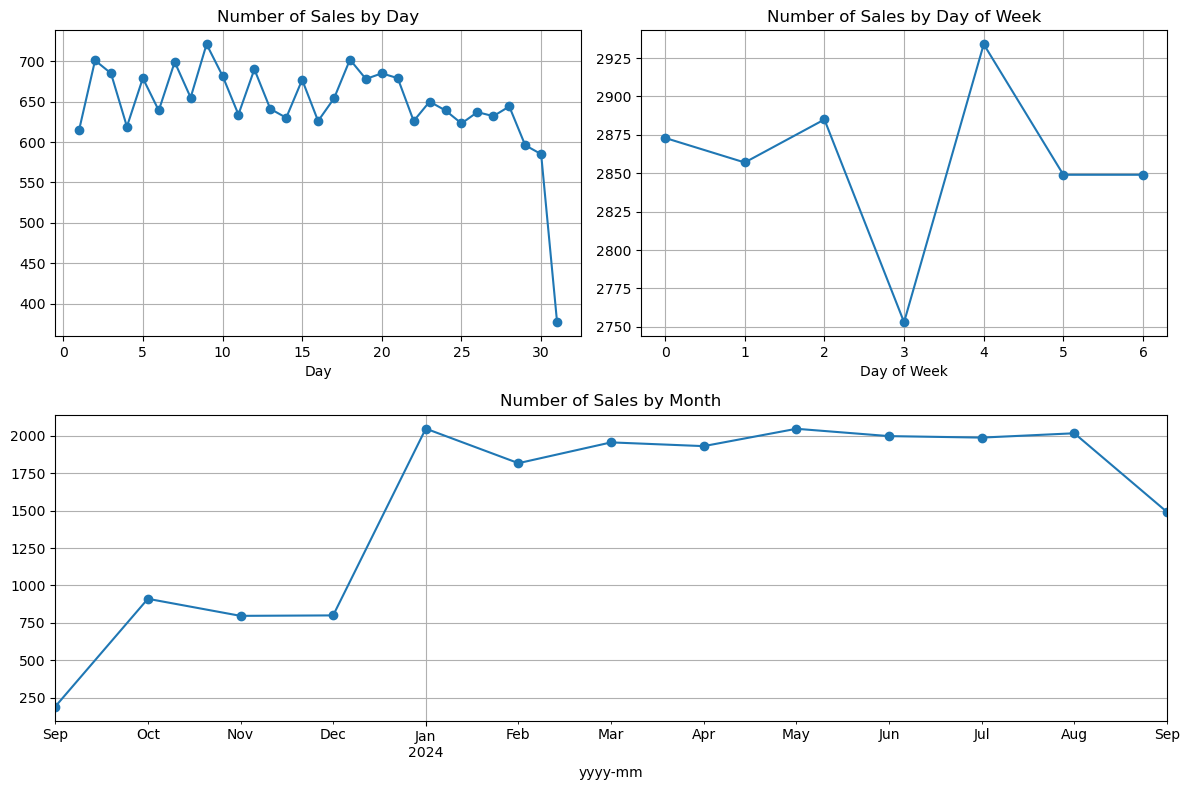

In [16]:
# Plot cho Purchase Date
eda_df = sales_df.copy()
eda_df['Purchase Date'] = pd.to_datetime(eda_df['Purchase Date'])
eda_df['Year'] = eda_df['Purchase Date'].dt.year
eda_df['Month'] = eda_df['Purchase Date'].dt.month
eda_df['Day'] = eda_df['Purchase Date'].dt.day
eda_df['Day of Week'] = eda_df['Purchase Date'].dt.dayofweek
eda_df["yyyy-mm"] = eda_df["Purchase Date"].dt.to_period('M')

fig, axd = plt.subplot_mosaic([['A', 'B'],
                               ['C', 'C']],
                              figsize=(12, 8), layout="constrained")

# Daily sales trend
daily_sales = eda_df.groupby('Day').size()
daily_sales.plot(marker='o', ax=axd['A'])
axd['A'].set_title('Number of Sales by Day')
axd['A'].grid(True)

# Weekly sales trend
weekly_sales = eda_df.groupby('Day of Week').size()
weekly_sales.plot(marker='o', ax=axd['B'])
axd['B'].set_title('Number of Sales by Day of Week')
axd['B'].grid(True)

eda_df.groupby('yyyy-mm').size().plot(kind='line', marker='o', ax=axd['C'])
axd['C'].set_title('Number of Sales by Month')
axd['C'].grid(True)

plt.tight_layout()
plt.show()

In [17]:
edited_sales_df = sales_df.copy()
# convert binary columns to 0 and 1
edited_sales_df["Is Male"] = edited_sales_df["Gender"].map(lambda val: 1 if val == "Male" else 0)
edited_sales_df["Loyalty Member"] = edited_sales_df["Loyalty Member"].map(lambda val:1 if val == "Yes" else 0)
edited_sales_df["Order Status"] = edited_sales_df["Order Status"].map(lambda val:1 if val == "Completed" else 0)
edited_sales_df.describe()

,Customer ID,Age,Loyalty Member,Rating,Order Status,Total Price,Unit Price,Quantity,Add-on Total,Is Male
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,0.217150,3.093950,0.671600,3180.133419,578.631867,5.485550,62.244848,0.508250
std,5631.732525,18.038745,0.412316,1.223764,0.469643,2544.978675,312.274076,2.870854,58.058431,0.499944
min,1000.000000,18.000000,0.000000,1.000000,0.000000,20.750000,20.750000,1.000000,0.000000,0.000000
25%,5478.000000,33.000000,0.000000,2.000000,0.000000,1139.680000,361.180000,3.000000,7.615000,0.000000
50%,10499.500000,49.000000,0.000000,3.000000,1.000000,2534.490000,463.960000,5.000000,51.700000,1.000000
75%,15504.000000,65.000000,0.000000,4.000000,1.000000,4639.600000,791.190000,8.000000,93.842500,1.000000
max,19998.000000,80.000000,1.000000,5.000000,1.000000,11396.800000,1139.680000,10.000000,292.770000,1.000000


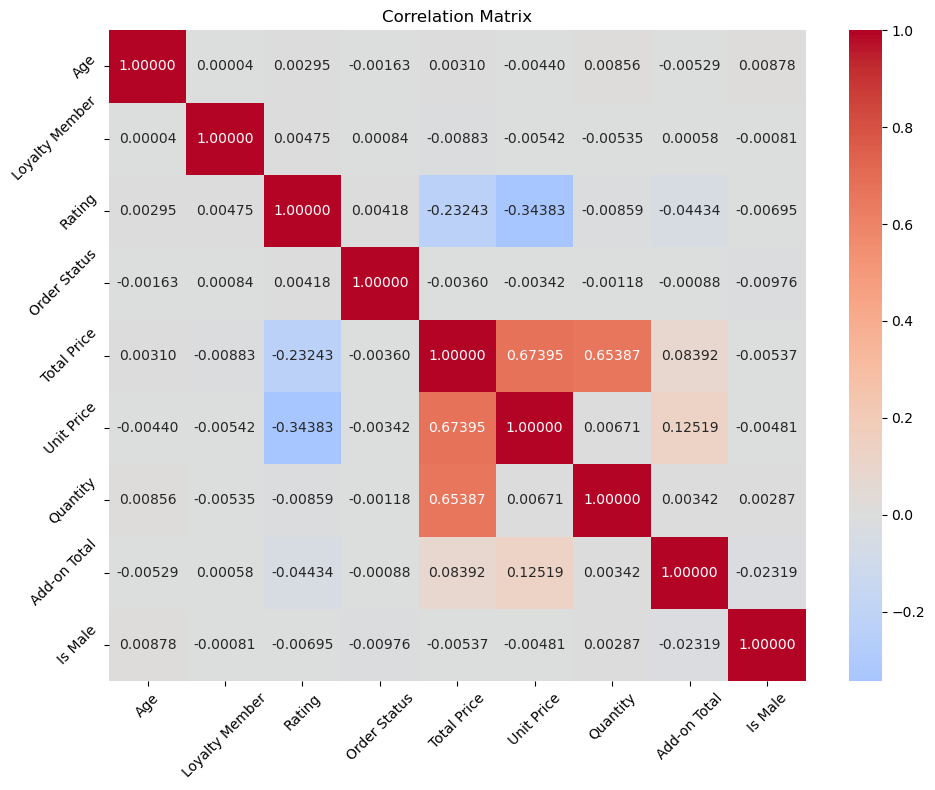

In [21]:
# Create correlation matrix for numerical variables
numeric_df = edited_sales_df.select_dtypes(include=['int64', 'float64']).drop(
    'Customer ID', axis=1)
corr_matrix = numeric_df.corr()  

# Plot heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".5f")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## **3. Asking Meaning Questions** 

## **4. Pre-processing & Analyzing Data to Answer each Questions** 

## **5. Reflection**

## **References**